## Python Notebook 3: Ensemble Classification & Decision Tree Regression

#Student Name :- Dunuhinga Wihanga
#UoW ID :-w2052079
#IIT ID :- 20231250

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tutorial 01 - Python Lab Seminar 01- Part (C)

In [ ]:
#Import all required libraries for classification & regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Tutorial 01 - Python Lab Seminar 01- Part (C)

In [ ]:
#Load the classification dataset from coursework (mortality prediction)
df_class = pd.read_csv("/content/drive/MyDrive/Final CourseWork/Classification_Dataset.csv")
X_class = df_class.drop('Mortality_Status', axis=1)
y_class = df_class['Mortality_Status']

Tutorial 02 - Part 01 - C - Partitioning the data into Training and Test sets

In [ ]:
#Split classification data (80% train / 20% test)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, stratify=y_class, random_state=42
)

Tutorial 07 - Voting (Soft Voting)

In [ ]:
#Rebuild best-performing base classifiers from Notebook 2 (with tuned parameters)
# Tuned Logistic Regression
lr = LogisticRegression(max_iter=1000, C=1, solver='liblinear')
# Tuned Nb
nb = GaussianNB(var_smoothing=np.float64(1e-06))

Tutorial 07 - Voting (Soft Voting) - Create VotingClassifier using soft voting

In [ ]:
#Create VotingClassifier using soft voting (Ensemble Learning)
ensemble_soft = VotingClassifier(estimators=[('lr', lr), ('Nb', nb)], voting='soft')
ensemble_soft.fit(X_train_c, y_train_c)
y_pred_ensemble = ensemble_soft.predict(X_test_c)

Tutorial 07 - Voting (Soft Voting) - Evaluate VotingClassifier ensemble model & ROC Curve


 Classification Report for VotingClassifier Ensemble:

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       648
           1       0.32      0.39      0.35       108

    accuracy                           0.79       756
   macro avg       0.60      0.62      0.61       756
weighted avg       0.81      0.79      0.80       756



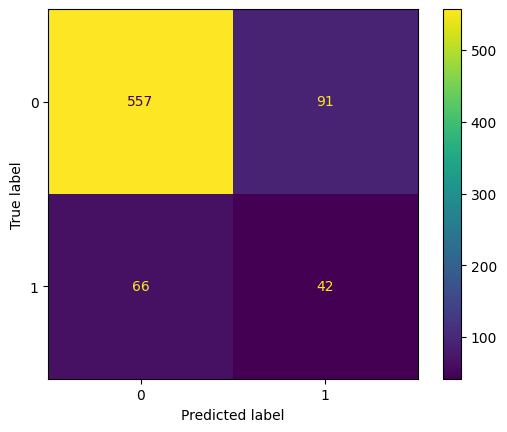

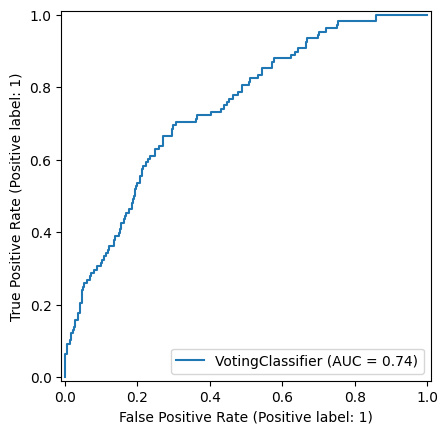

In [ ]:
#Evaluate VotingClassifier ensemble model
print("\n Classification Report for VotingClassifier Ensemble:\n")
print(classification_report(y_test_c, y_pred_ensemble))
ensemble_cm = confusion_matrix(y_test_c, y_pred_ensemble)
ConfusionMatrixDisplay(confusion_matrix=ensemble_cm, display_labels=ensemble_soft.classes_).plot()
RocCurveDisplay.from_estimator(ensemble_soft, X_test_c, y_test_c)

Tutorial 06 - Part E - Regression Modelling - Step 01

In [ ]:
#Load the regression dataset from coursework (survival months)
df_reg = pd.read_csv("/content/drive/MyDrive/Final CourseWork/Regression_Dataset.csv")
X_reg = df_reg.drop('Survival_Months', axis=1)
y_reg = df_reg['Survival_Months']

Tutorial 06 - Part E - Regression Modelling - Step 02

In [ ]:
#Split regression data (80% train / 20% test)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=10
)
print("Train shape:", X_train_r.shape)
print("Test shape:", X_test_r.shape)

Train shape: (432, 13)
Test shape: (109, 13)


Tutorial 06 - Part E - Regression Modelling - Step 03


Full Regression Tree Depth: 23


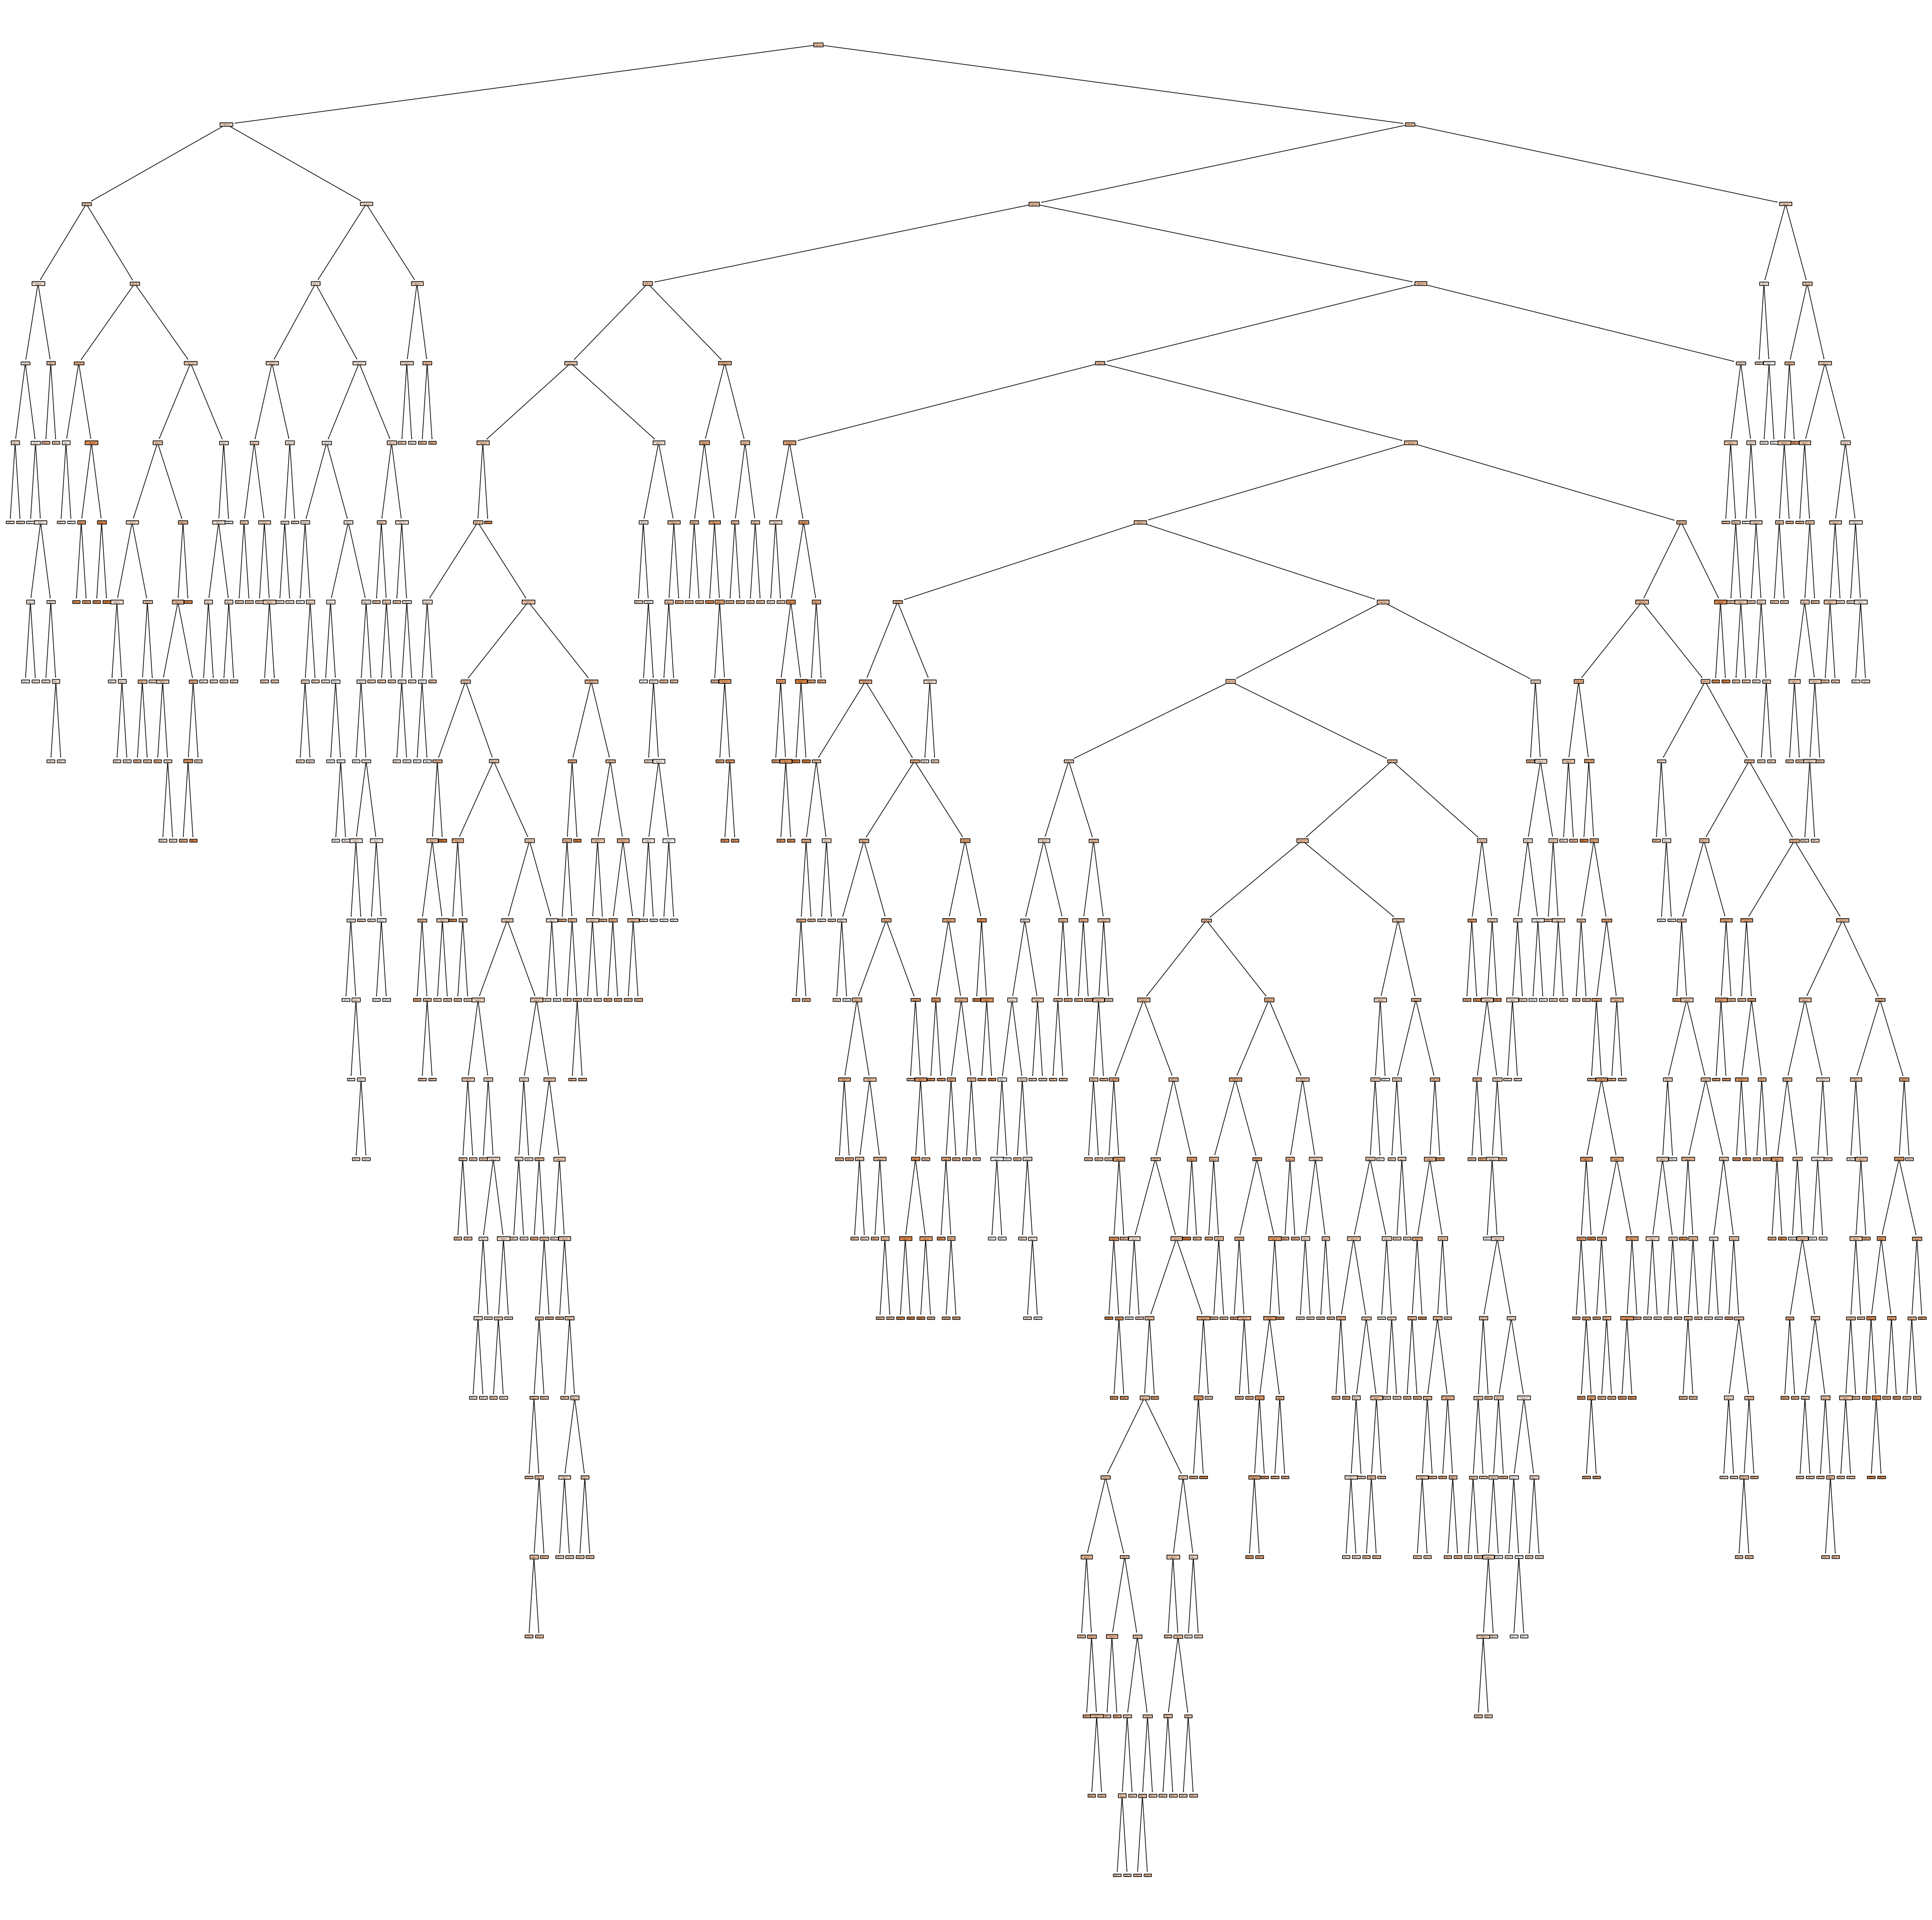

In [ ]:
#Train fully-grown DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_r, y_train_r)
y_pred_reg = regressor.predict(X_test_r)
print("\nFull Regression Tree Depth:", regressor.tree_.max_depth)
plt.figure(figsize=(50, 50))
plot_tree(regressor, feature_names=X_train_r.columns, filled=True)
plt.savefig("full_grown_reg_decision_tree.png")

Tutorial 06 - Part E - Regression Modelling - Step 04

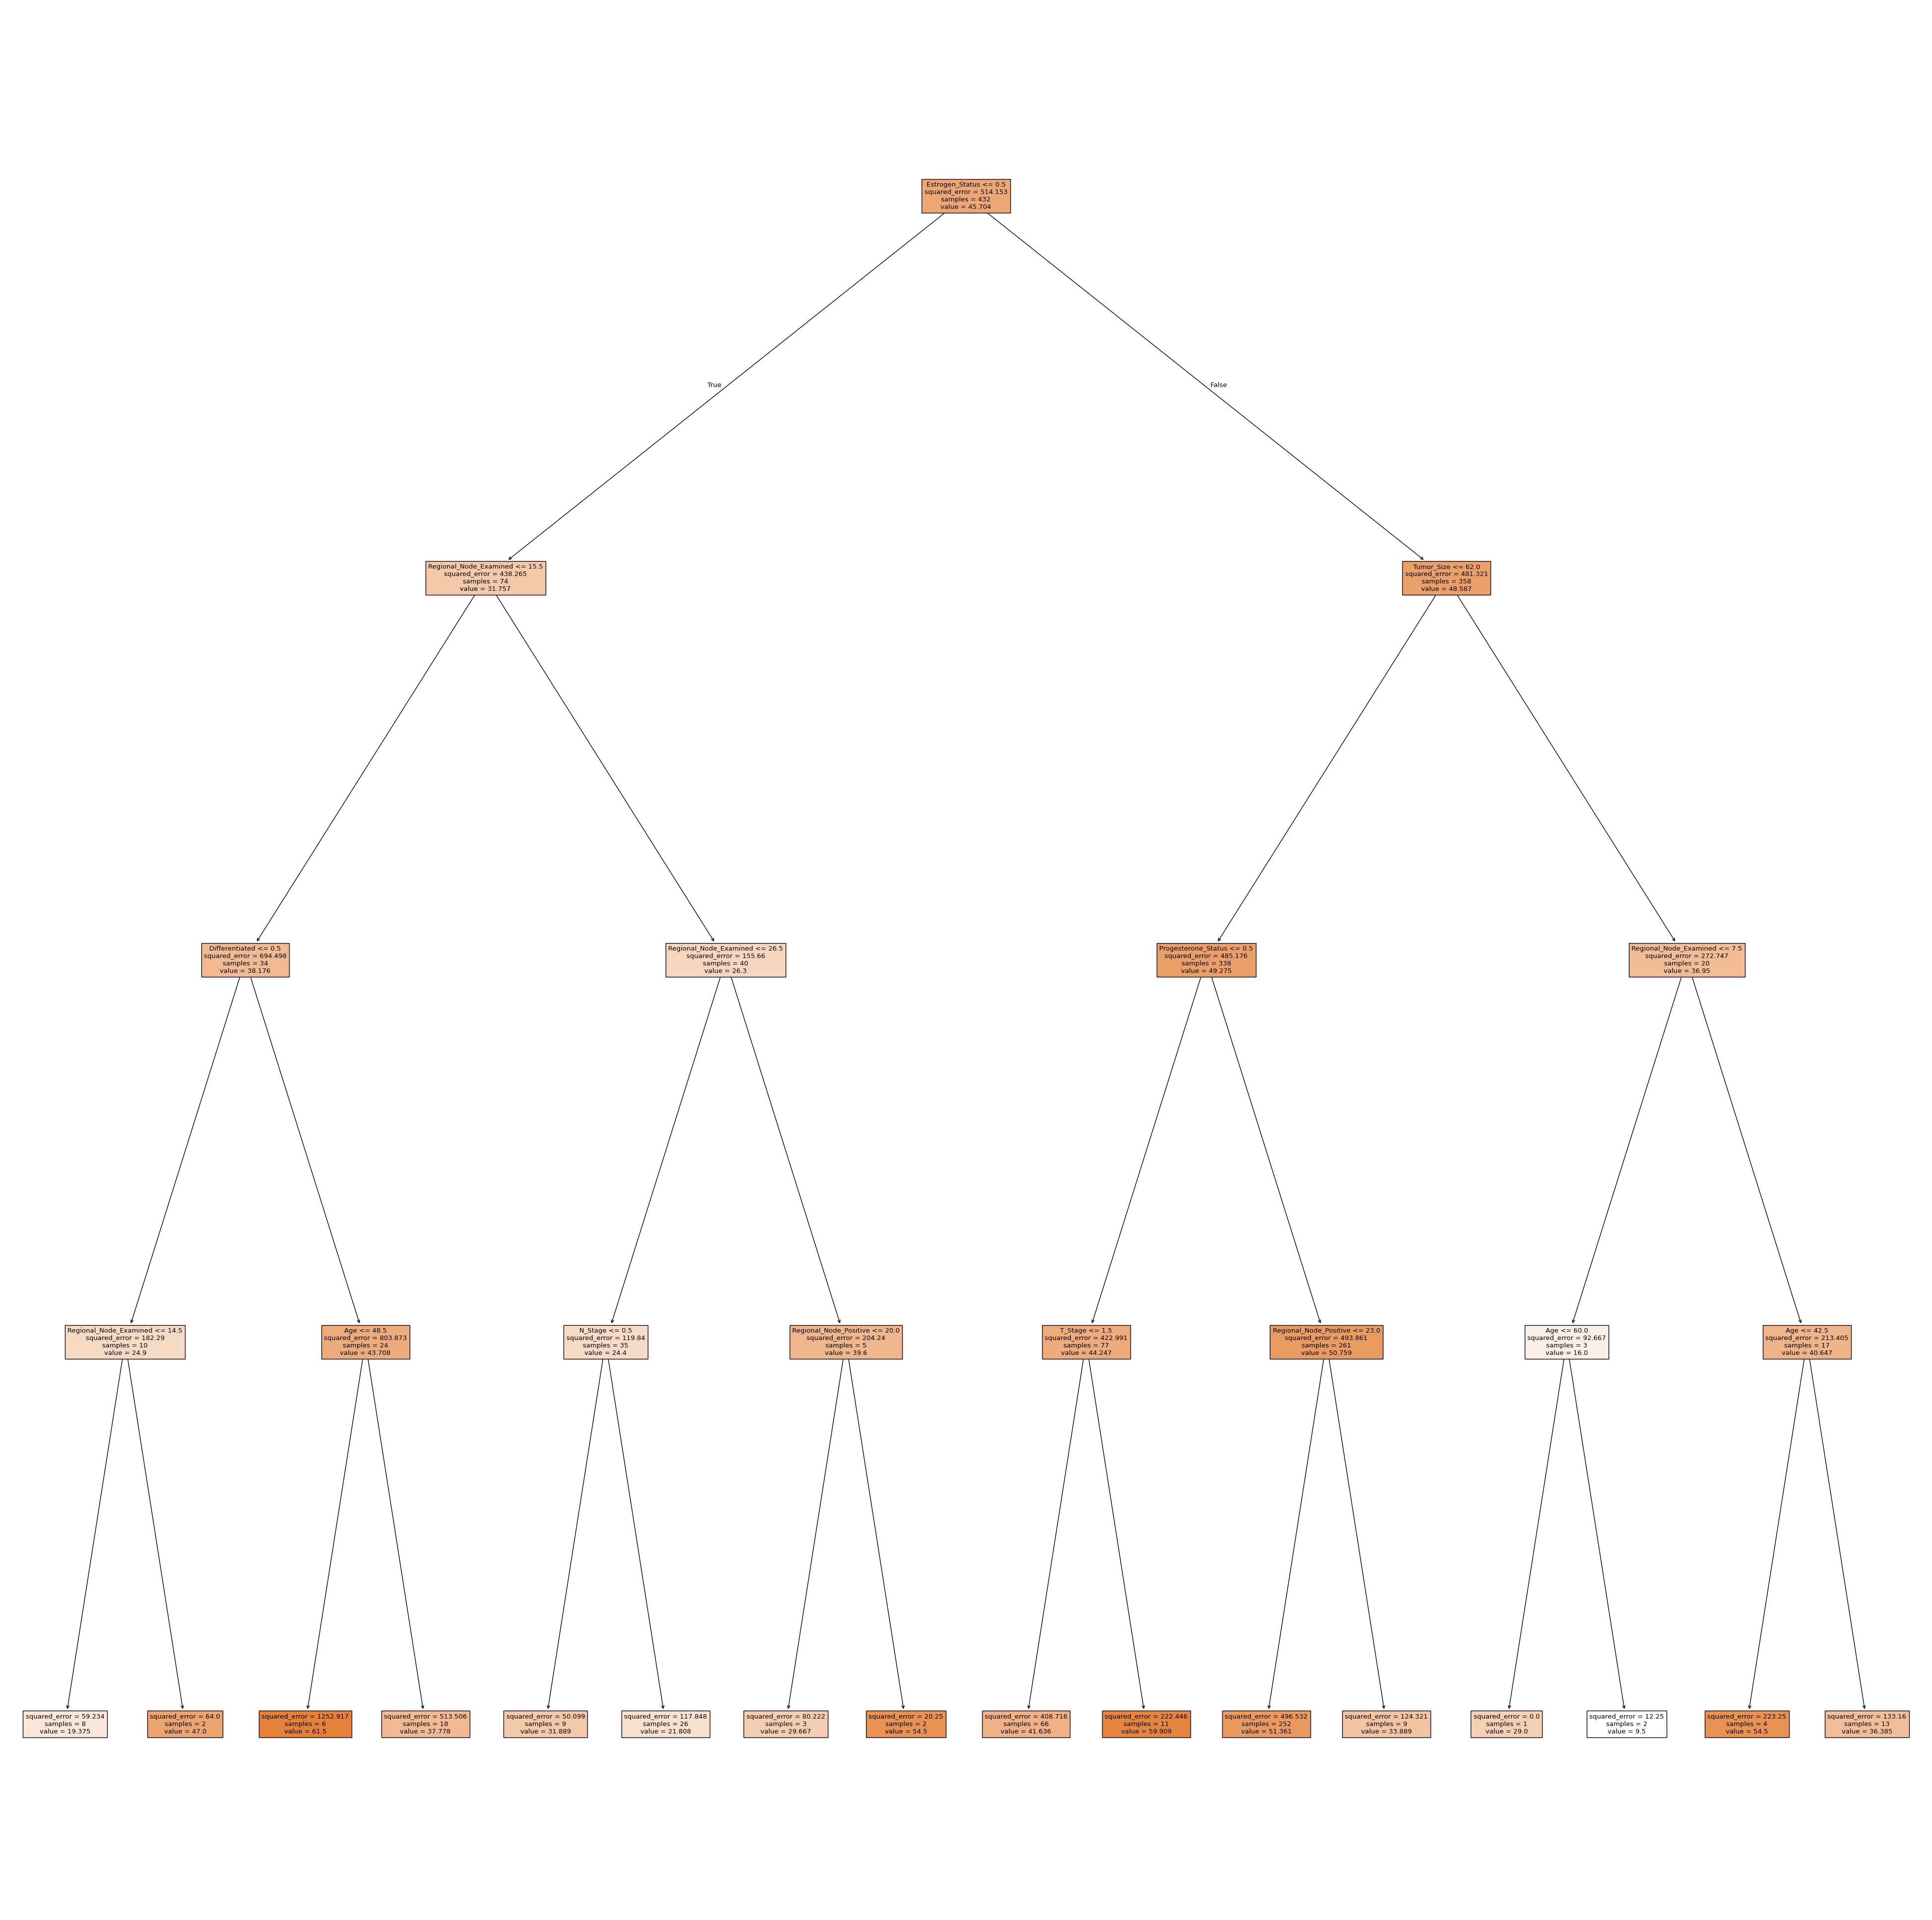

In [ ]:
#Train pruned DecisionTreeRegressor (max_depth=4) and plot
pruned_regressor = DecisionTreeRegressor(max_depth=4)
pruned_regressor.fit(X_train_r, y_train_r)
y_pred_pruned = pruned_regressor.predict(X_test_r)
plt.figure(figsize=(50, 50))
plot_tree(pruned_regressor, feature_names=X_train_r.columns, filled=True)
plt.savefig("pruned_reg_decision_tree.png")

Tutorial 06 - Part F - Performance Evaluation of fully-grown regressor

In [ ]:
#Evaluate fully-grown regressor
print("\nFully Grown Tree Metrics")
print("MAE:", metrics.mean_absolute_error(y_test_r, y_pred_reg))
print("MSE:", metrics.mean_squared_error(y_test_r, y_pred_reg))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test_r, y_pred_reg)))
print("R2:", metrics.r2_score(y_test_r, y_pred_reg))


Fully Grown Tree Metrics
MAE: 24.908256880733944
MSE: 1012.651376146789
RMSE: 31.82218371115956
R2: -0.5291564246804115


Tutorial 06 - Part F - Performance Evaluation of pruned regressor

In [ ]:
#Evaluate pruned regressor
print("\nPruned Tree Metrics")
print("MAE:", metrics.mean_absolute_error(y_test_r, y_pred_pruned))
print("MSE:", metrics.mean_squared_error(y_test_r, y_pred_pruned))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test_r, y_pred_pruned)))
print("R2:", metrics.r2_score(y_test_r, y_pred_pruned))


Pruned Tree Metrics
MAE: 20.652036419238247
MSE: 651.6105635497084
RMSE: 25.526663776328242
R2: 0.016034043786037566


Report Case Study B - Task 4

In [ ]:
# Corrected patient data (matching training features only)
patient_df = pd.DataFrame({
    'Age': [29],
    'Sex': [1],
    'T_Stage': [2],
    'N_Stage': [0],
    '6th_Stage': [4],
    'Differentiated': [0],
    'Grade': [2],
    'A_Stage': [1],
    'Tumor_Size': [41],
    'Estrogen_Status': [0],
    'Progesterone_Status': [1],
    'Regional_Node_Examined': [5],
    'Regional_Node_Positive':[1]
})

predicted_survival_months = pruned_regressor.predict(patient_df)[0]

print(f"Cleaned Predicted Survival Months: {predicted_survival_months:.2f}")

Cleaned Predicted Survival Months: 19.38
